In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#dep info later
%matplotlib inline

In [2]:
df = pd.read_csv("cleandata.csv")
columns = list(df)
df['Position'] = pd.Categorical(df['Position'],
                                    categories=['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer',
                                                'Lab Lecturer'],
                                    ordered=True)
df["age_by_5"] = ((df["age"] -1)// 4) * 4+1
df["C"] = pd.to_numeric(df["C"], errors="coerce")
df["P"] = pd.to_numeric(df["P"], errors="coerce")
df["H"] = pd.to_numeric(df["H"], errors="coerce")
df["P5"] = pd.to_numeric(df["P5"], errors="coerce")
df["C5"] = pd.to_numeric(df["C5"], errors="coerce")
df["H5"] = pd.to_numeric(df["H5"], errors="coerce")
df["avgC"] = pd.to_numeric(df["avgC"], errors="coerce")
df["P5avg"] = df["P5"] /6
df["C5avg"] = df["C5"] /6
df["H5avg"] = df["H5"] /6

list_of_positions = ['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer', 'Lab Lecturer']
list_of_dept = df["Dept"].value_counts().index
df[["P","C","H","P5","C5","H5"]] = df[["P","C","H","P5","C5","H5"]].fillna(0)
df["Cavg"]=df["C"]/df["age"]




In [3]:
# dexetai "C" gia anafores h "P" dimosieuseis kai ena filto gia ilikia kai epistreyfei ta timeseries se dusdiastato pinaka


def meleti_ana_xrono(c_or_p,age=-1):
  
    #epilogi C or P
    if c_or_p=="P":
        start = "2020.1"
    else:
        start = "2020.2"
    
    
    #filtro
    if age ==-1:
        dfc = df.loc[:,start:"1981.2":2]
    else:    
        filt= df["age_by_5"]==age
        dfc = df[filt].loc[:,start:"1981.2":2]
        
        
    #prosarmogh se numpy pinaka    
    for column in dfc:
        dfc[column] = pd.to_numeric(dfc[column], errors="coerce")
    np_arrayc = dfc.to_numpy()
    np_arrayc = np.flip(np_arrayc, axis=1)
    return np_arrayc


In [4]:
def percentile(x):
    x = x*100
    return round(x,1)

<H2> Αναλυση με βαση την θέση </H2>

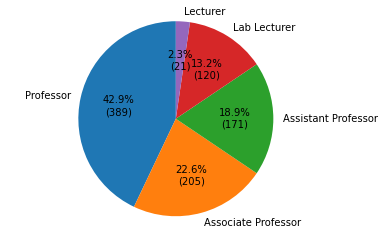

Professor              389
Associate Professor    205
Assistant Professor    171
Lab Lecturer           120
Lecturer                21
Name: Position, dtype: int64


In [5]:
#sunarntish gia tis arithmitikes times sto piechart

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


def professor_position_count():
    title = "Ποσοστό πρωσοπικού ανα θέση"
    y = df["Position"].value_counts()
    x =y.index.values.tolist()
    fig1, ax1 = plt.subplots()
    ax1.pie(y, labels=['Professor', 'Associate Professor', 'Assistant Professor', 'Lab Lecturer', 'Lecturer'] ,autopct=lambda pct: func(pct, y),startangle=90)
    ax1.axis('equal') 

    plt.savefig('pos1.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(y)

professor_position_count()
    

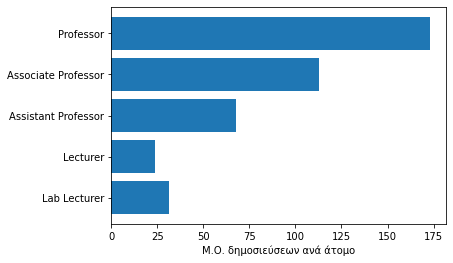

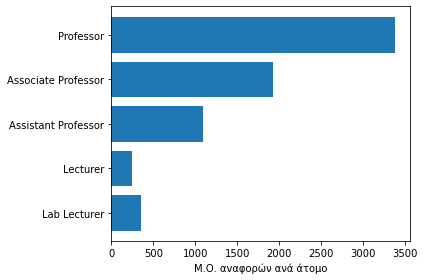

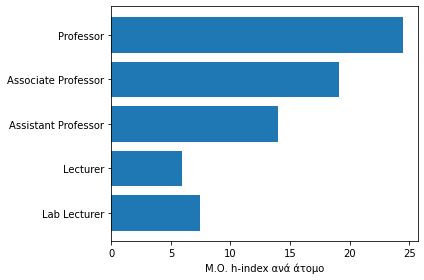

In [6]:
def citations_publications_avg_per_position():
   
    #publications
    title = "Δημοσιεύσεις"
    y = df.groupby("Position").mean().sort_index(ascending=False)["P"]
    x =y.index.values.tolist()
    plt.barh(x,y)
#     plt.title(title)
    plt.xlabel("Μ.Ο. δημοσιεύσεων ανά άτομο")
    plt.savefig('pos2P.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    
    #citations
    title = "Αναφόρες"
    y = df.groupby("Position").mean().sort_index(ascending=False)["C"]
    x =y.index.values.tolist()
    plt.xlabel("Μ.Ο. αvαφορών ανά άτομο")
    plt.barh(x,y)
#     plt.title(title)
    plt.tight_layout()
    plt.savefig('pos3C.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    
    
    #h-index    
    title = "h-index"
    plt.xlabel("Μ.Ο. h-index ανά άτομο")
    df['H/P'] =df["C"]/df["P"]
    y = df.groupby("Position").mean().sort_index(ascending=False)["H"]
    x =y.index.values.tolist()
    plt.barh(x,y)
#     plt.title(title)
    plt.tight_layout()
    plt.savefig('pos4H.png', dpi=300, bbox_inches='tight')
    plt.show()

citations_publications_avg_per_position()

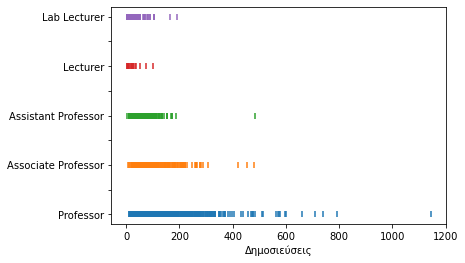

In [7]:
y = df.groupby("Position")


for i in range(len(list_of_positions)):
    z = y.get_group(list_of_positions[i])["P"]
    z= z.fillna(0)
    plt.yticks(ticks = [j/2 for j in range(0,9)], labels=["Professor","","Associate Professor","","Assistant Professor","","Lecturer","","Lab Lecturer"])
    m = [i for _ in z]
    plt.xlabel("Δημοσιεύσεις")
    plt.scatter(z,m, label=None, picker=True, zorder=2,marker="|")
    plt.savefig('pos7.png', dpi=300, bbox_inches='tight')
plt.show()



   

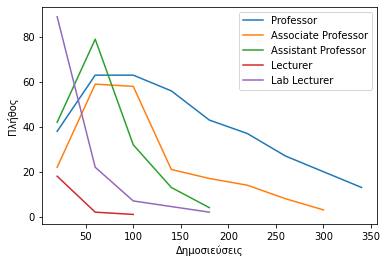

In [8]:

filt=df["P"]<359
y = df[filt].groupby("Position")
for i in range(len(list_of_positions)):
    z = (y.get_group(list_of_positions[i])["P"]//40)*40+20
    z= z.value_counts().sort_index()
    plt.plot(z,label=list_of_positions[i])
plt.xlabel("Δημοσιεύσεις")
plt.ylabel("Πλήθος")

plt.legend()
plt.savefig('pos8.png', dpi=300, bbox_inches='tight')
plt.show()


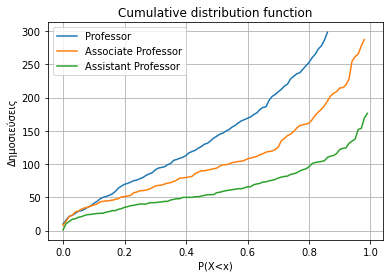

In [9]:
for position in list_of_positions[:3]:
    #dimiourgei mia lista 100 thesewn me ta quantile values gia kathe thesh
    quantiles = [ ]
    filt = (df["Position"]==position)
    for i in range(0,100):
        quantiles.append(df[filt]["P"].quantile(i/100))
        temp_quantiles = [citations for citations in quantiles if citations<300]
    plt.plot([i/100 for i in range(len(temp_quantiles))],temp_quantiles, label=position)
plt.ylabel("Δημοσιεύσεις")
plt.xlabel("P(X<x)")

plt.title("Cumulative distribution function")
plt.grid()    
plt.legend() 
plt.savefig("cdf.png")
plt.show()
        
        

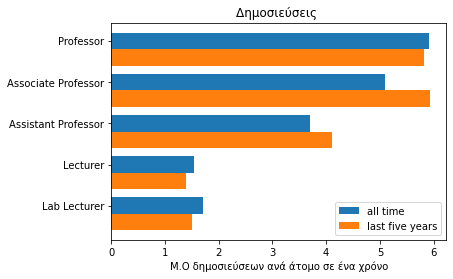

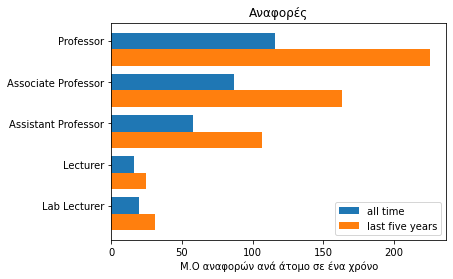

In [10]:
def citations_publications_avg_per_position_five():
    
    #Publications
    title = "Δημοσιεύσεις "
    widt=0.4
    y = df.groupby("Position").mean().sort_index(ascending=False)["avgP"]
    x =y.index.values.tolist()
    x_indexex = np.arange(len(x))
    plt.barh(x_indexex,y,height=widt,label="all time")
    y = df.groupby("Position").mean().sort_index(ascending=False)["P5avg"]
    plt.barh(x_indexex-widt,y,height=widt,label="last five years")
    plt.xlabel("Μ.Ο δημοσιεύσεων ανά άτομο σε ένα χρόνο")
    plt.legend()
    plt.yticks(ticks=x_indexex,labels=x)
    plt.title(title)
    plt.savefig('pos5P5.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    
    
    #Citations
    title = "Αναφορές"
    y = df.groupby("Position").mean().sort_index(ascending=False)["avgC"]
    x =y.index.values.tolist()
    x_indexex = np.arange(len(x))
    plt.barh(x_indexex,y,height=widt,label="all time")
    y = df.groupby("Position").mean().sort_index(ascending=False)["C5avg"]
    plt.barh(x_indexex-widt,y,height=widt,label="last five years")
    plt.xlabel("Μ.Ο αναφορών ανά άτομο σε ένα χρόνο")
    plt.legend()
    plt.yticks(ticks=x_indexex,labels=x)
    plt.title(title)
    plt.savefig('pos6C5.png', dpi=300, bbox_inches='tight')
    plt.show()
    
citations_publications_avg_per_position_five()   

<H2> Αναλυση με βαση την ηλικια </H2>

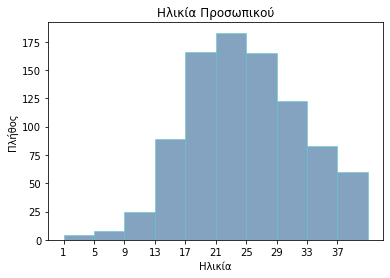

In [11]:
def professor_age():
    y = df["age_by_5"].value_counts().sort_index()
    x =y.index.values.tolist()
    x_indexex = np.arange(len(x))
    title = "Ηλικία Προσωπικού"
    plt.bar(x_indexex+0.5,y,width=1,color=(0.2, 0.4, 0.6, 0.6),edgecolor=(0.4, 0.8, 0.8, 0.6))
    plt.xticks(ticks=x_indexex,labels=x)
    plt.title(title)
    plt.xlabel("Ηλικία")
    plt.ylabel("Πλήθος")
    plt.savefig('age1.png', dpi=300, bbox_inches='tight')
    plt.show()

professor_age()    
    
    

<h4> Δημοσιευσεις αναλυση </h4>

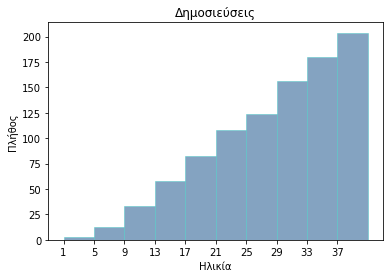

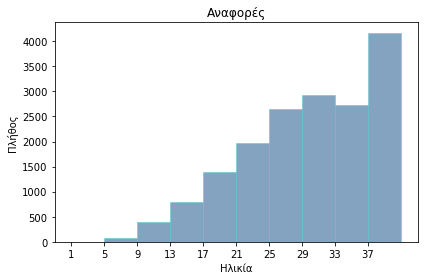

In [22]:
def citations_publications_avg_per_age():
    y = df.groupby("age_by_5").mean()["P"]
    x =y.index.values.tolist()
    x_indexex = np.arange(len(x))
    title = "Δημοσιεύσεις"
    plt.xlabel("Ηλικία")
    plt.ylabel("Πλήθος")
    plt.bar(x_indexex+0.5,y,width=1,color=(0.2, 0.4, 0.6, 0.6),edgecolor=(0.4, 0.8, 0.8, 0.6))
    plt.xticks(ticks=x_indexex,labels=x)
    plt.title(title)
    plt.savefig('age2.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    
    
    title = "Αναφορές"
    y = df.groupby("age_by_5").mean()["C"]
    x =y.index.values.tolist()
    plt.title(title)
    plt.xlabel("Ηλικία")
    plt.ylabel("Πλήθος")
    plt.bar(x_indexex+0.5,y,width=1,color=(0.2, 0.4, 0.6, 0.6),edgecolor=(0.4, 0.8, 0.8, 0.6))
    plt.xticks(ticks=x_indexex,labels=x)
    plt.tight_layout()
    plt.savefig('age3.png', dpi=300, bbox_inches='tight')
    plt.show()
#     print(df.groupby("age_by_5").describe()["P"])
#     print(df.groupby("age_by_5").describe()["C"])
    
citations_publications_avg_per_age()  
    

In [23]:
#epistrefei ton meso oro kathe stilis afou stoixisei ta dedomena aristera


def performance_years_of_work(C_or_P):
    # gia meleti ana xrono
    np_arrayc = meleti_ana_xrono(C_or_P)

    
    
    # stoixizei ton pinaka aristera
    
    for row in range(len(np_arrayc)):
        roll_counter=0
        for column in np_arrayc[row]:
            if np.isnan(column):
                roll_counter+=1
            else:
                break        
        np_arrayc[row]=np.roll(np_arrayc[row],-roll_counter)
#     print(np_arrayc)
    return np.nanmean(np_arrayc, axis=0, dtype=None, out=None)

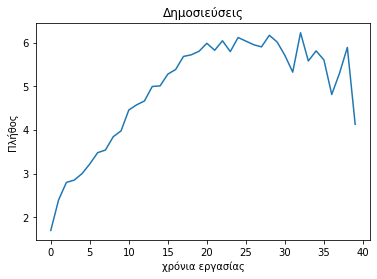

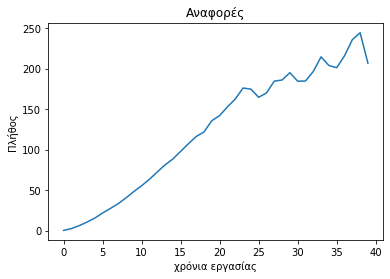

In [24]:
y = performance_years_of_work("P")


#plot
title = "Δημοσιεύσεις"
plt.title(title)
plt.ylabel("Πλήθος")    
plt.xlabel("χρόνια εργασίας")
    
plt.plot(y)
plt.savefig( 'age4.png', dpi=300, bbox_inches='tight')
plt.show()
    
    
y=  performance_years_of_work("C")


title = "Αναφορές"
plt.title(title)
plt.plot(y)
plt.ylabel("Πλήθος")    
plt.xlabel("χρόνια εργασίας")
plt.savefig( 'age5.png', dpi=300, bbox_inches='tight')
plt.show()


<H5>Αναφορες αναλυση</H5>

C:\Users\chick\AppData\Local\Temp/ipykernel_1456/4161071027.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/4161071027.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/4161071027.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/4161071027.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/4161071027.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/4161071027.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)


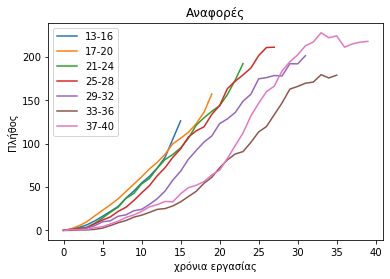

In [29]:
def meleti_ana_C():
    # gia meleti ana xrono
    for age in range(13,40,4):
        np_arrayc = meleti_ana_xrono("C",age)
        for row in range(len(np_arrayc)):
            roll_counter=0
            for column in np_arrayc[row]:
                if np.isnan(column):
                    roll_counter+=1
                else:
                    break
            np_arrayc[row]=np.roll(np_arrayc[row],-(roll_counter//4*4))
        
        y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
        plt.plot(y,label=f"{age}-{age+3}") 
    
    
    
    plt.title("Αναφορές")
    plt.legend()
    plt.ylabel("Πλήθος")
    plt.xlabel("χρόνια εργασίας")
    plt.savefig( 'age7.png', dpi=300, bbox_inches='tight')
    plt.show()


meleti_ana_C()



C:\Users\chick\AppData\Local\Temp/ipykernel_1456/1506059065.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/1506059065.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/1506059065.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/1506059065.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/1506059065.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/1506059065.py:14: RuntimeWarning: Mean of empty slice
  y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)


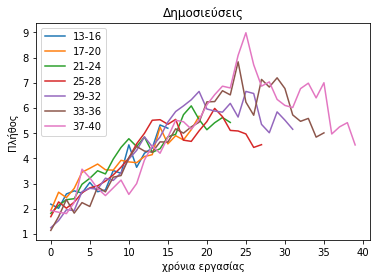

In [28]:
def meleti_ana_P():
    # gia meleti ana xrono
    for age in range(13,40,4):
        np_arrayc = meleti_ana_xrono("P",age)
        for row in range(len(np_arrayc)):
            roll_counter=0
            for column in np_arrayc[row]:
                if np.isnan(column):
                    roll_counter+=1
                else:
                    break
#roll ana 4 gt alliws problima
            np_arrayc[row]=np.roll(np_arrayc[row],-(roll_counter//4*4))
        y= np.nanmean(np_arrayc, axis=0, dtype=None, out=None)
        plt.plot(y,label=f"{age}-{age+3}") 
    plt.legend()
    plt.title("Δημοσιεύσεις")
    plt.ylabel("Πλήθος")
    plt.xlabel("χρόνια εργασίας")
    plt.savefig( 'age11.png', dpi=300, bbox_inches='tight')
    plt.show()


meleti_ana_P()

C:\Users\chick\AppData\Local\Temp/ipykernel_1456/3293798982.py:3: RuntimeWarning: Mean of empty slice
  x = np.nanmean(meleti_ana_xrono("C",i), axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/3293798982.py:3: RuntimeWarning: Mean of empty slice
  x = np.nanmean(meleti_ana_xrono("C",i), axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/3293798982.py:3: RuntimeWarning: Mean of empty slice
  x = np.nanmean(meleti_ana_xrono("C",i), axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/3293798982.py:3: RuntimeWarning: Mean of empty slice
  x = np.nanmean(meleti_ana_xrono("C",i), axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/3293798982.py:3: RuntimeWarning: Mean of empty slice
  x = np.nanmean(meleti_ana_xrono("C",i), axis=0, dtype=None, out=None)
C:\Users\chick\AppData\Local\Temp/ipykernel_1456/3293798982.py:3: RuntimeWarning: Mean of empty slice
  x = np.nanmean(meleti_ana_

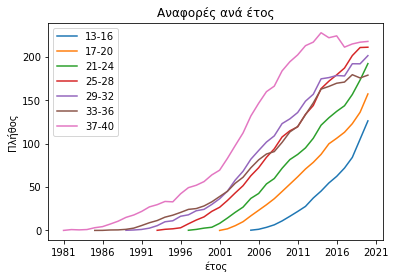

In [27]:
def citations_checking():
    for i in range(13,40,4):
        x = np.nanmean(meleti_ana_xrono("C",i), axis=0, dtype=None, out=None)

        plt.plot(x,label= f"{i}-{i+3}")
    plt.title("Αναφορές ανά έτος")
    plt.xticks(ticks=[i for i in range(0,41,5)],labels=[j for j in range(1981,2022,5)])
    plt.legend()
    plt.xlabel("έτος")
    plt.ylabel("Πλήθος")
    plt.savefig( 'age8.png', dpi=300, bbox_inches='tight')
    plt.show()
    
citations_checking()    

<H3> age-position </H3>

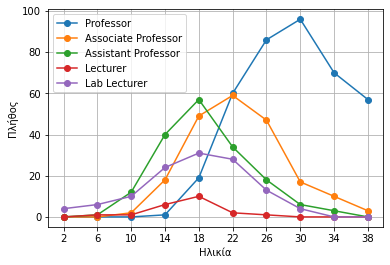

In [18]:
def age_position_comparison():
    empty_list = []
    temp = df.groupby("age_by_5")
    age_range =  temp.sum().index.to_list()

        


    for i in df.groupby("age_by_5").sum().index.to_list():
#         print(temp["Position"].get_group(i).value_counts().sort_index(axis=0, ascending=False))

        empty_list.append(temp["Position"].get_group(i).value_counts().sort_index(axis=0, ascending=True).to_list())

    values = [i*4+2 for i in range(len(empty_list))]
    # print(empty_list)

    for i in range(len(list_of_positions)):
        x=[]
        for j in range(len(empty_list)):
            x.append(empty_list[j][i])
        plt.plot(x , marker='o',label=list_of_positions[i])
    plt.xticks([i for i in range(len(empty_list))],values)
    plt.xlabel("Ηλικία")
    plt.ylabel("Πλήθος")
    plt.legend()
    plt.grid()
    plt.savefig("age-position.png")
    plt.show()

age_position_comparison()

<H2>Αναλυση με βαση τμημα</H2>

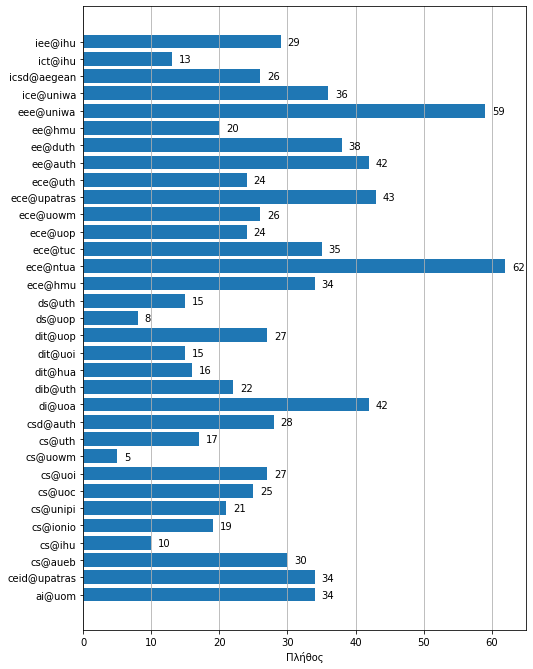

In [16]:
def professors_per_dep():
    y = df["Dept"].value_counts().sort_index()
    x =y.index.values.tolist()
    title = "Διδακτικό Προσωπικό ανά Τμήμα"
    plt.barh(x,y)
#     plt.title(title)



    for i, v in enumerate(y):
        plt.text(v+1, i-0.2, str(v), color='black')

    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    plt.xlabel("Πλήθος")  
    plt.grid(axis="x")
    plt.savefig('dep1.png', dpi=300, bbox_inches='tight')
    plt.show()
#     print(y.describe())
#     print(y)

professors_per_dep()


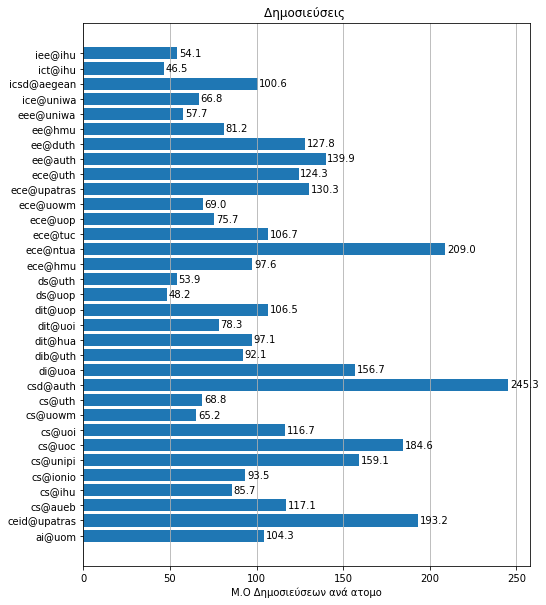

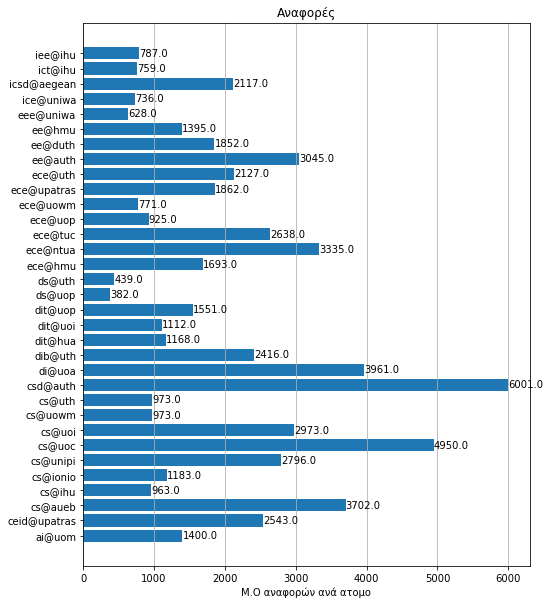

In [19]:
def citations_publications_avg_per_department():
    #Publications
    title = "Δημοσιεύσεις "
    z = df.groupby("Dept").mean()["P"]
    x =z.index.values.tolist()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    plt.barh(x,z)
    for i, v in enumerate(z):
        plt.text(v+1, i-0.2, str(round(v,1)), color='black')
    plt.grid(axis="x")
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    plt.xlabel("Μ.Ο Δημοσιεύσεων ανά ατομο")

    plt.title(title)
    plt.savefig('dep2.png', bbox_inches='tight')
    plt.show()
    
    #Citations
    title = "Αναφορές"
    y = df.groupby("Dept").mean()["C"]
    x =y.index.values.tolist()
    
    plt.barh(x,y)
    plt.xlabel("Μ.Ο αναφορών ανά ατομο")
    for i, v in enumerate(y):
        plt.text(v+1, i-0.2, str(round(v,0)), color='black')
    plt.title(title)
    plt.grid(axis="x")
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    plt.savefig('dep3.png', dpi=300, bbox_inches='tight')
    plt.show()


    
citations_publications_avg_per_department()    

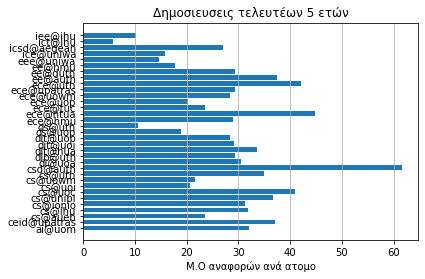

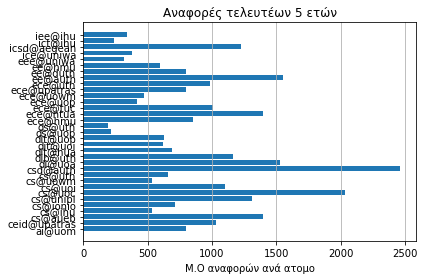

In [18]:
def citations_publications_avg_per_department_five():
    
    #Publications
    title = "Δημοσιευσεις τελευτέων 5 ετών"
    y = df.groupby("Dept").mean()["P5"]
    x =y.index.values.tolist()
    plt.barh(x,y)
    plt.grid(axis="x")
    plt.title(title)
    plt.xlabel("Μ.Ο αναφορών ανά ατομο")
    plt.savefig(title + '.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    
    #Citations
    title = "Αναφορές τελευτέων 5 ετών"
    y = df.groupby("Dept").mean()["C5"]
    plt.xlabel("Μ.Ο αναφορών ανά ατομο")
    x =y.index.values.tolist()
    plt.grid(axis="x")
    plt.barh(x,y)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(title + '.png', dpi=300, bbox_inches='tight')
    plt.show()
    title = "H5 per person grouped by department mean"
    
citations_publications_avg_per_department_five()    

<H3> Αναλογιες θεσεων ανα τμημα </H3>

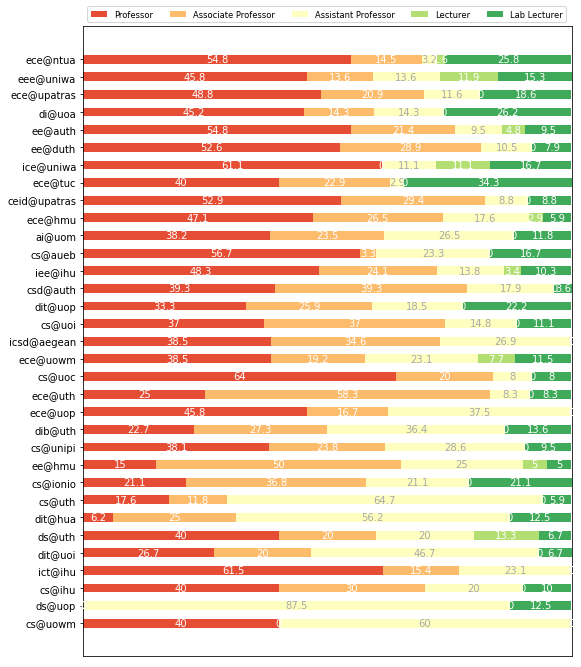

In [22]:
def ratios_position_department():
    the_dict = {}
    sizes = df["Dept"].value_counts().index.to_list()

    for size in sizes:
        the_dict[size]=df.groupby("Dept").get_group(size).value_counts("Position", normalize=True).sort_index(axis=0, ascending=True).apply(percentile).to_list()

#     print(the_dict)
    labels = list(the_dict.keys())
    data = np.array(list(the_dict.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
         np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(list_of_positions, category_colors)):
            widths = data[:, i]
            starts = data_cum[:, i] - widths
            rects = ax.barh(labels, widths, left=starts, height=0.5,
                            label=colname, color=color)

            r, g, b, _ = color
            text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
            ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(list_of_positions), bbox_to_anchor=(0, 1),
                  loc='lower left', fontsize='small')
    #plt.title("staff_position_ratios %")
    plt.tight_layout()
    fig.set_size_inches(8, 10)
    plt.savefig('dep-pos.png', dpi=300, bbox_inches='tight')
    plt.show()
    return the_dict

ratios_position_department=ratios_position_department()

<H4> apodotikotita </H4>



${apodotikotita} =\frac{{Rprof}_{dep}{Pprof}_{dep} + {Rassi}_{dep} {Passi}_{dep} + {Rasso}_{dep}{Passo}_{dep}+ {Rlect}_{dep}{Plect}_{dep} + {Rlabl}_{dep}{Plabl}_{dep}}{{Rprof}_{dep}{Pprof}_{glob} + {Rassi}_{dep} {Passi}_{glob} + {Rasso}_{dep}{Passo}_{glob}+ {Rlect}_{dep}{Plect}_{glob} + {Rlabl}_{dep}{Plabl}_{glob}} $


R = ratios of position in one department <br>
P = publications avg <br>
glob =  all departments <br>
dep  = one department <br>
prof = professor <br>
asso =  assocciate professor <br>
assi = assistant professor <br>
lect =  lecturer <br>
lab =  lab lecturer <br>

Στην ουσια συγκρινουμε με αυτες τις αναλογιες καθηγητων, ποσα publications εχουν, με ποσα θα επρεπε να εχουν με βαση τον ολικο μεσο ορο

In [23]:
#gia na treksei thelei na treksei prwta to ratios_position_departments


def apodotikotita():
    temp = df.groupby("Dept")
    apod_df = pd.DataFrame(columns  = ["dep", "efficiency"])
    
    #mesos oros epidoshs kathe theshs
    list_of_mean_of_all_dep = df.groupby("Position").mean()["P5"].to_list()
    
    #gia kathe sxolh
    for key,dep_ratios in ratios_position_department.items():
        apodotikotita_dep=0
        apodotikotita_avg=0
        #eisagwgh se lista toys mesoys orous kathe theshs mias sxolhs
        list_of_mean_of_a_dep = temp.get_group(key).groupby("Position").mean()["P5"].fillna(0).to_list()
        
        #mathimatikos tupos
        for i in range(5):
            apodotikotita_dep= apodotikotita_dep + list_of_mean_of_a_dep[i]*dep_ratios[i]
            apodotikotita_avg=apodotikotita_avg + list_of_mean_of_all_dep[i]*dep_ratios[i]
        apodotikotita=apodotikotita_dep/apodotikotita_avg
        apodotikotita=round(apodotikotita,2)
        apod_df = apod_df.append({"dep":key,"efficiency":apodotikotita},ignore_index = True)

    print(apod_df.sort_values(by="efficiency",ascending=False))

apodotikotita()

             dep  efficiency
13      csd@auth        1.90
0       ece@ntua        1.62
19       ece@uth        1.30
25        cs@uth        1.30
26       dit@hua        1.29
18        cs@uoc        1.28
4        ee@auth        1.24
22      cs@unipi        1.24
8   ceid@upatras        1.16
3         di@uoa        1.14
24      cs@ionio        1.13
10        ai@uom        1.09
21       dib@uth        1.05
30        cs@ihu        1.04
14       dit@uop        1.03
17      ece@uowm        1.03
28       dit@uoi        1.02
2    ece@upatras        1.01
9        ece@hmu        0.94
5        ee@duth        0.92
7        ece@tuc        0.91
31        ds@uop        0.83
16   icsd@aegean        0.83
11       cs@aueb        0.83
32       cs@uowm        0.75
15        cs@uoi        0.67
20       ece@uop        0.65
6      ice@uniwa        0.60
23        ee@hmu        0.59
1      eee@uniwa        0.55
27        ds@uth        0.38
12       iee@ihu        0.34
29       ict@ihu        0.18


In [24]:
#epistrefei ta atoma pou exoun parapanw C kai P apo ton meso oro ths epomenhs bathmidas mono gia Associate kai Assistant

def to_be_promoted():
    avgC = df.groupby("Position").mean()["C"].to_list()
    avgP = df.groupby("Position").mean()["P"].to_list()
    print(avgP[0:2])
    print(avgC[0:2])
    for position in range(1,3):
            filt = (df["Position"] == list_of_positions[position]) & (df["C"] >avgC[position-1] ) & (df["P"] >avgP[position-1] )
            # print(tempdf.get((list_of_positions[position-1],region)))
            temp_df = df[["Name", "Position", "C", "P", "Dept"]].loc[filt]
            print(temp_df)
            print(f"brethikan {temp_df.shape[0]} atoma")

    
to_be_promoted()

[173.16966580976865, 112.89756097560975]
[3381.9151670951155, 1923.1414634146342]
                        Name             Position        C    P          Dept
6            Aggelos Kiayias  Associate Professor  10428.0  288        di@uoa
22     Alexandros Potamianos  Associate Professor   7280.0  207      ece@ntua
38          Anastasios Tefas  Associate Professor   7542.0  453      csd@auth
144      Christos Verikoukis  Associate Professor   7751.0  480  ceid@upatras
383     Gerasimos Potamianos  Associate Professor   6213.0  195       ece@uth
397      Grigorios Tsoumakas  Associate Professor  14429.0  187      csd@auth
404             Haris Doukas  Associate Professor   4805.0  195      ece@ntua
488  Konstantinos E. Psannis  Associate Professor   3860.0  183        ai@uom
660           Nikos Mamoulis  Associate Professor  13809.0  281        cs@uoi
661         Nikos Nikolaidis  Associate Professor   6335.0  257      csd@auth
668             Nikos Pleros  Associate Professor   4282.0  

In [25]:
#epistrefei ta atoma pou exoun parapanw C kai P apo ton meso oro ths epomenhs bathmidas toy tmimatos tous

def to_be_promoted():
    counter = 0
    temp_for_c = df.groupby(["Position", "Dept"]).mean()["C"].to_dict()
    temp_for_p = df.groupby(["Position", "Dept"]).mean()["P"].to_dict()
    regions = df.groupby("Dept").sum().index.to_list()
    for region in regions:
        for position in range(1, 3):
            filt = (df["Dept"] == region) & (df["Position"] == list_of_positions[position]) & (df["C"] > temp_for_c.get((list_of_positions[position - 1], region))) & (df["P"] > temp_for_p.get((list_of_positions[position - 1], region)))
            # print(tempdf.get((list_of_positions[position-1],region)))
            temp_df = df[["Name", "Position", "C", "P", "Dept"]].loc[filt]
            if not temp_df.empty:
                counter  = counter + len(temp_df)
                print(df[["Name", "Position", "C","P", "Dept"]].loc[filt])
                print(f"C avg is {temp_for_c.get((list_of_positions[position - 1], region))} and P avg {temp_for_p.get((list_of_positions[position - 1], region))} ")
    print(f"people to be promoted found {counter}")
    
to_be_promoted()

                        Name             Position       C    P    Dept
488  Konstantinos E. Psannis  Associate Professor  3860.0  183  ai@uom
C avg is 2099.769230769231 and P avg 152.3846153846154 
                         Name             Position       C    P    Dept
68      Apostolos Ampatzoglou  Assistant Professor  1957.0  111  ai@uom
689  Panagiotis Papadimitriou  Assistant Professor  1938.0  103  ai@uom
C avg is 1398.0 and P avg 100.5 
                    Name             Position       C    P          Dept
144  Christos Verikoukis  Associate Professor  7751.0  480  ceid@upatras
C avg is 3151.0 and P avg 247.27777777777777 
                     Name             Position       C    P     Dept
60        Antonis Dimakis  Assistant Professor   471.0   42  cs@aueb
285    Evangelos Markakis  Assistant Professor  3834.0   77  cs@aueb
379  Georgios Papaioannou  Assistant Professor  1462.0   95  cs@aueb
384     Giannis F. Marias  Assistant Professor  1227.0  103  cs@aueb
780      Spyros 